# King County Housing with Multiple Linear Regression

#### Author: Pengju Sun 
#### Date: 03/22/2021

## Business Problem

The stakholders in a housing development company are searching for qualities that lead to higher home sale prices. The data was used for ananlysing is from the data of houses in King County. My goal is to develop models to make predictions about sale price of houses based on certain variables or features, so that they can be used to make profitable decisions by a housing development company. 

## Hypothesis

Null Hypothesis: There is no relationship between features and sale price of houses.

Alternative Hypothesis: There is a relationship between features and sale price of houses.

A significance level (alpha) of 0.05 will being used to make the determination, and will make the final recommendations accordingly.

## Data Description

King County House Data: a dataset that we were provided at the onset of the project. This file contains data for 21,597 homes built in King County from 1900 to 2015. Each home in the set contains information regarding features such as number of bedrooms/bathrooms, number of floors, square footage, zip code, condition, and more.

In [1]:
# import the packeages that I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

### Kings Country House Data

In [2]:
# reading the csv file
data = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.shape

(21597, 21)

In [5]:
# Chaning the date data type from object to datetime
data.date = pd.to_datetime(data['date'])
# Creating a new column 'sold_year' 
data['sold_year'] = data['date'].dt.year
# Calculating the age of the each house when they were sold
data['house_age'] = data['sold_year'] - data['yr_built']

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,house_age
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,43.323286
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.377285
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


- The dataset contains a wide range of houses price from 7,8000 dollars all the way up to 7.7 million dollars. The mean house price is 540,297 dollars, while the median house price is 450,000 dollars
- Therer were 21579 houses sold in King County from 2014 to 2015
- The oldest solded house is 115 years while the youngest solded house is 18 years. The age of the house is 43 years.
- The mean square-feet of living space is 2,080 square feet, but there are houses as small as 370 sqft and as large as 13,540 sqft in this dataset.



## Data Cleaning

### 1. Looking at objects(strings), confirm that this data is supposed to be encoded as strings

In [7]:
# The data type of sqft_basement is object. Apparently sqft_basement is numeric data, 
# so we can conclude that numeric data sqft_basement was wrongly encoded as strings.

In [8]:
data.sqft_basement.value_counts()
# 454 notknown data encoded as string "?"

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
652.0         1
1990.0        1
283.0         1
1525.0        1
2810.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
#replacing "?" by "0" and changing datatype to numeric data
data.sqft_basement = data.sqft_basement.str.replace('?','0').astype('float')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

### 2. Detecting and Dealing with NULL Values

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707
id,0,0.000000
sqft_basement,0,0.000000
sold_year,0,0.000000
sqft_lot15,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000


In [12]:
Null_val_col = ['waterfront', 'view', 'yr_renovated']

In [13]:
for col in Null_val_col:
    print(data[col].unique())
    print(data[col].nunique())


[nan  0.  1.]
2
[ 0. nan  3.  4.  2.  1.]
5
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
70


In [14]:
for col in Null_val_col:
    print(data[col].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [15]:
#For categorical data, I choose to fill the most frequent data
def fillna(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col
data[Null_val_col] = data[Null_val_col].apply(lambda col:fillna(col))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Data Feature Exploration (Exploratory Data Analysis)

In [17]:
# Drop columns that I dont need
data.drop(columns = ['id','date','sold_year','yr_built'],inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  house_

### 1. Finding Correlation between various features and the target variable

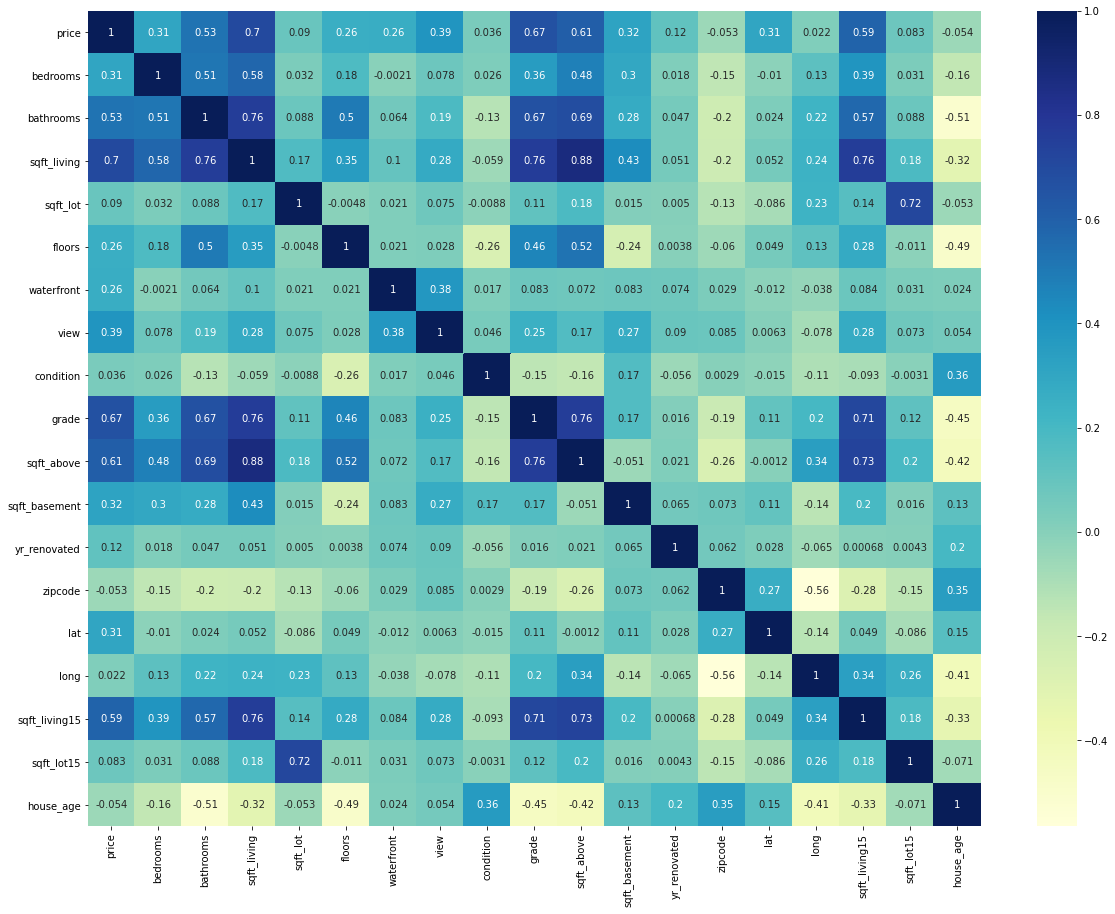

In [19]:
corr = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.savefig('Heatmap')

In [20]:
corr['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

### 2. Use 'stack' and a subset to return only the hightly correlated pairs for features.

In [21]:
data_features = data.drop('price', axis = 1)
corr_features = data_features.corr()
a = corr_features.abs().stack().reset_index().sort_values(0,ascending = False)
a['pairs'] = list(zip(a.level_0, a.level_1))
a.drop(columns=['level_1', 'level_0'], inplace = True)
a.set_index(['pairs'],inplace = True)
a.columns = ['cc']
a.drop_duplicates(inplace = True)
a[(a.cc>0.75) & (a.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


1. square foot living area, grade(amount of floors), square feet above the ground level and sqft_15 features displayed the highest correlation wih the price of the house.
2. Moreover, there is a high correlation of sqft_living with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms.
3. sqft_living,sqft_above and sqft_basement are moderately to strongly corrleated with price. The three variables were also strongly realted to each other. Especially for sqft_living and sqft_above, the corrleation cofficient is over 8.5, so I will be removing sqft_above from the analysis to reduce multicollinearity.

In [22]:
data.drop(columns = ['sqft_above'],inplace = True)

### 3. Explore Categorical Data

In [23]:
#Convert "yr_renovated" to dichotomous variables
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
data.drop('yr_renovated', axis = 1, inplace = True)

In [25]:
#Convert "sqft_basement" to dichotomous variables
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
data.drop('sqft_basement', axis = 1, inplace = True)

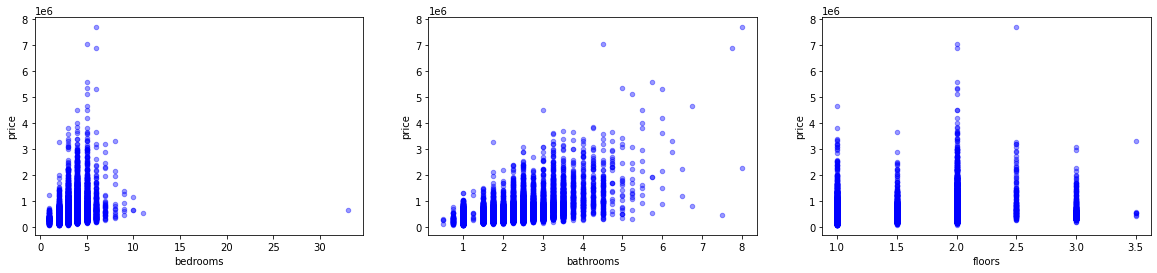

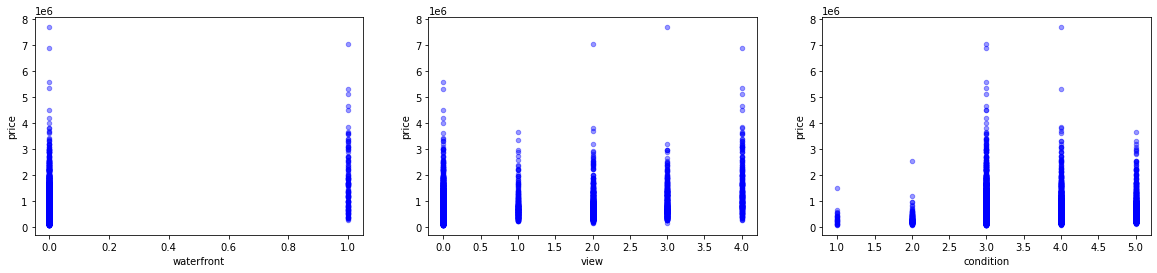

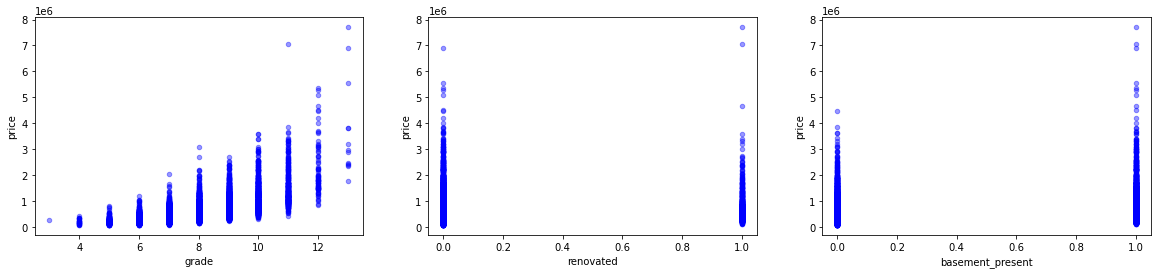

In [27]:
#Identify categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['waterfront','view','condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
for xcol, ax in zip(['grade','renovated','basement_present'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

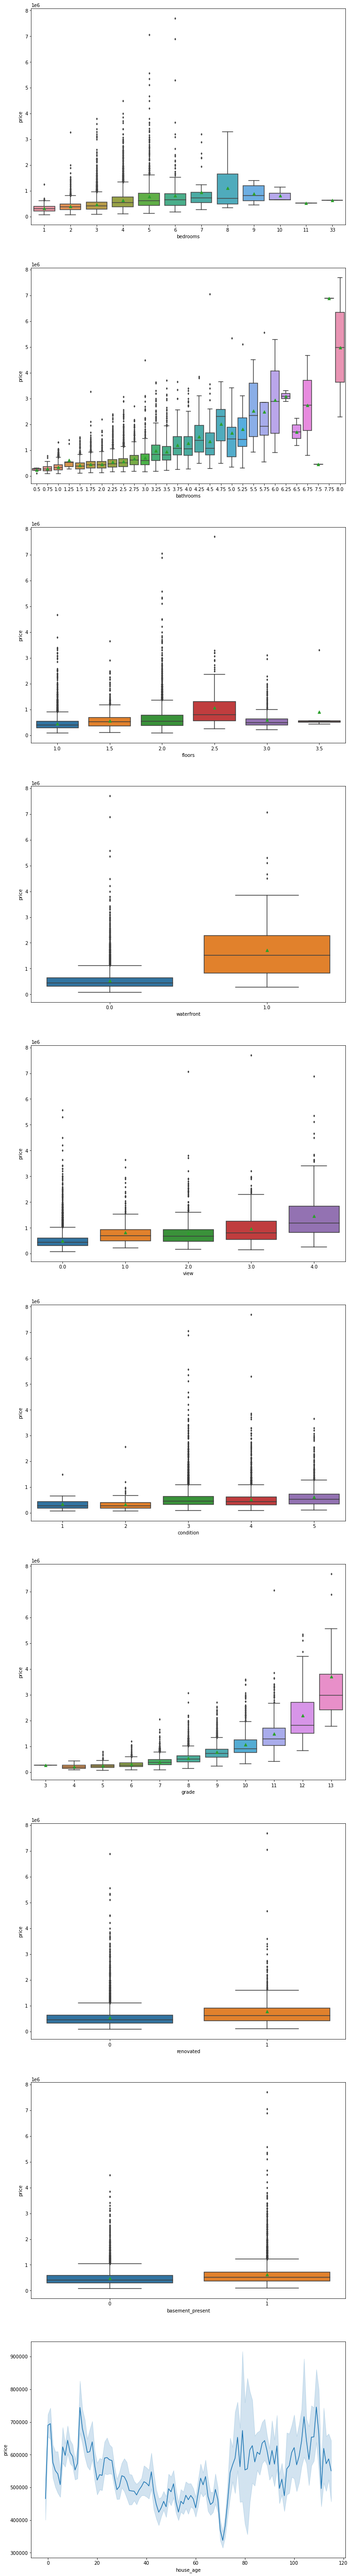

In [28]:
cat_feat = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present','house_age','lat','long','zipcode']
fig,ax = plt.subplots(10, figsize=(12,100))
sns.boxplot(x = 'bedrooms', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[0])
sns.boxplot(x = 'bathrooms', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[1])
sns.boxplot(x = 'floors', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[2])
sns.boxplot(x = 'waterfront', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[3])
sns.boxplot(x = 'view', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[4])
sns.boxplot(x = 'condition', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[5])
sns.boxplot(x = 'grade', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[6])
sns.boxplot(x = 'renovated', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[7])
sns.boxplot(x = 'basement_present', y = 'price', data = data,width = 0.8, showmeans = True, fliersize = 3, ax = ax[8])
#Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval
sns.lineplot(x = 'house_age', y = 'price', data = data, ax = ax[9])
plt.show()

There seems to be an anomaly in the bedrooms.One house has 33 bedrooms. Although such houses do exist, the price of this house is less than a million,and it has 1.75 bathrooms and is on 1 floor.This suggests that the house has 3 bedrooms and the 33 is a data entry error.So it is safer to change 33 to 3.

In [29]:
data[data.bedrooms== 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,98103,47.6878,-122.331,1330,4700,67,0,1


In [30]:
data['bedrooms'].iloc[15856] = 3

1. The house of houses with more number of bathrooms are higher but it kind of plateaus near 7-8 bathrooms
2. The price of houses increases for houses with 0-2.5 (around 3) floors and then subsequently decreases
3. Houses with more number of floors have higher price.
4. Houses having a waterfront are valued higher.
5. In case of view and grade, prices increase as their number increase. 
6. Condition does not convey much information. 
7. Bedsrooms, bathrooms, floors, views, and grade were moderately to strongly associated with price.
8. I would expect a linear relationship with newer houses being significantly more expensive. However, this is not the case as seen by the graph. The corrlelation coefficent is -0.05389, which shows a very insignificantly negative relationship between house age and price. So I will be removing house_age from the analysis.

In [31]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,1340,5650,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,1690,7639,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,2720,8062,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1360,5000,49,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,1800,7503,28,0,0


### 4. Explore Continous Data

In [32]:
data_1 = data

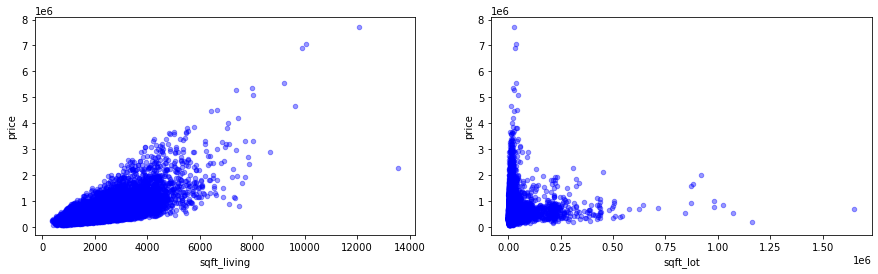

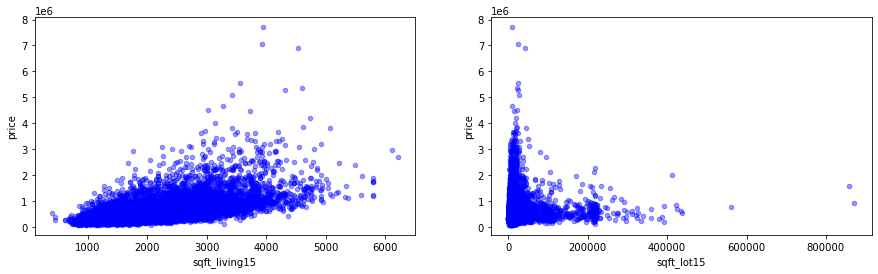

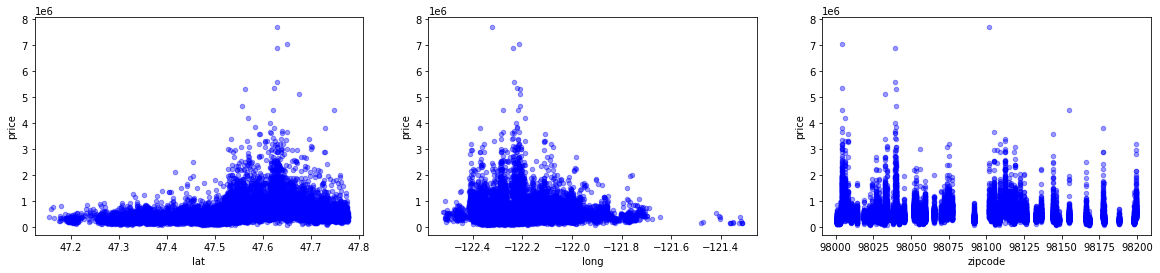

In [33]:
#Identify continous data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
for xcol, ax in zip(['sqft_living','sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
for xcol, ax in zip(['sqft_living15','sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))    
for xcol, ax in zip(['lat','long','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

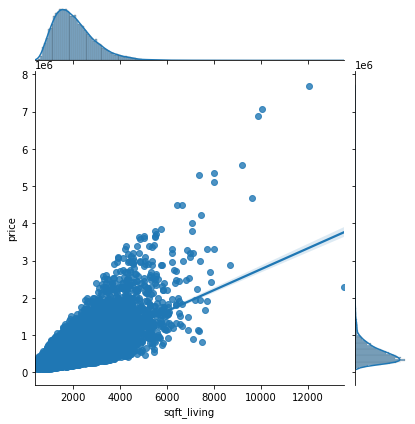

In [34]:
sns.jointplot(x = data['sqft_living'],y= data['price'], data = data, kind = 'reg')
plt.savefig('Joinplot_sqft_living_vs_Price')

In [35]:
cont_target_feature = ['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','lat','long','zipcode']
cont_feature = ['sqft_living','sqft_lot','sqft_living15','sqft_lot15','lat','long','zipcode']

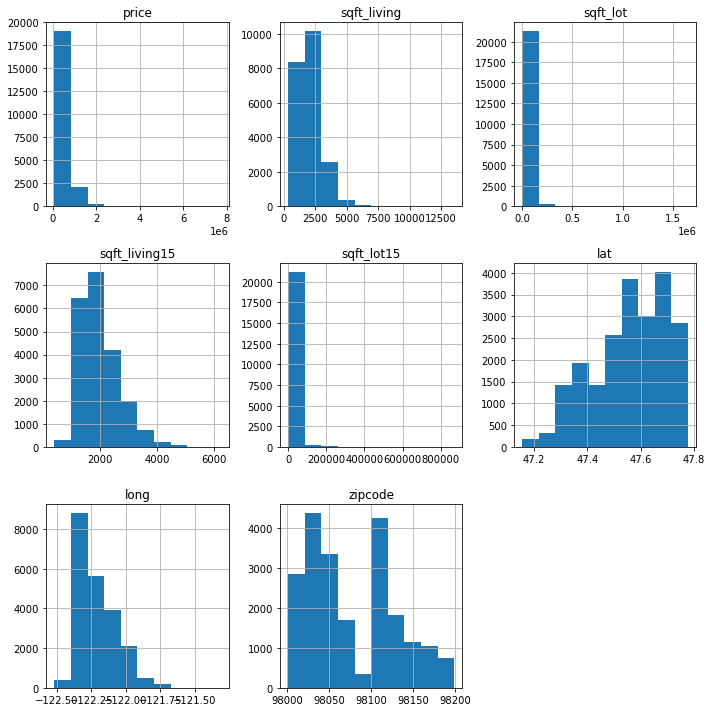

In [36]:
data_1[cont_target_feature].hist(figsize = (10,10))
plt.tight_layout();

In [37]:
data_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,1340,5650,59,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,1690,7639,63,1,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,2720,8062,82,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1360,5000,49,0,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,1800,7503,28,0,0


In [38]:
data_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated,basement_present
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,43.323286,0.034449,0.38510
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,53.513072,0.138552,0.140724,685.230472,27274.441950,29.377285,0.182384,0.48663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.000000,0.00000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000,0.00000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000,0.00000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000,1.00000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000,1.00000


## Data Feature Engineering

### 1. Dealing with Caegorical Variables - Creating Dummy Variables

In [39]:
categorical_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present']

In [40]:
bd_dummies = pd.get_dummies(data_1['bedrooms'], prefix='bd', drop_first=True)
bth_dummies = pd.get_dummies(data_1['bathrooms'], prefix='bth', drop_first=True)
fl_dummies = pd.get_dummies(data_1['floors'], prefix='fl', drop_first=True)
wf_dummies = pd.get_dummies(data_1['waterfront'], prefix='wf', drop_first=True)
vw_dummies = pd.get_dummies(data_1['view'], prefix='vw', drop_first=True)
con_dummies = pd.get_dummies(data_1['condition'], prefix='con', drop_first=True)
gd_dummies = pd.get_dummies(data_1['grade'], prefix='gd', drop_first=True)
rn_dummies = pd.get_dummies(data_1['renovated'], prefix='rn', drop_first=True)
bs_dummies = pd.get_dummies(data_1['basement_present'], prefix='bs', drop_first=True)
data_2 = data_1.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovated','basement_present'],axis = 1)
data_3 = data_2.join([bd_dummies,bth_dummies,fl_dummies,wf_dummies,vw_dummies,con_dummies,gd_dummies,rn_dummies,bs_dummies])
data_3.head()

,price,sqft_living,sqft_lot,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,bd_2,...,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13,rn_1,bs_1
0,221900.0,1180,5650,98178,47.5112,-122.257,1340,5650,59,0,...,0,1,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,98125,47.7210,-122.319,1690,7639,63,0,...,0,1,0,0,0,0,0,0,1,1
2,180000.0,770,10000,98028,47.7379,-122.233,2720,8062,82,1,...,1,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,98136,47.5208,-122.393,1360,5000,49,0,...,0,1,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,98074,47.6168,-122.045,1800,7503,28,0,...,0,0,1,0,0,0,0,0,0,0


## Model Testing

## Model 1

In [41]:
feature_cols = data_3.columns[1:]

In [42]:
feature_cols

Index(['sqft_living', 'sqft_lot', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'bd_2', 'bd_3', 'bd_4', 'bd_5', 'bd_6',
       'bd_7', 'bd_8', 'bd_9', 'bd_10', 'bd_11', 'bth_0.75', 'bth_1.0',
       'bth_1.25', 'bth_1.5', 'bth_1.75', 'bth_2.0', 'bth_2.25', 'bth_2.5',
       'bth_2.75', 'bth_3.0', 'bth_3.25', 'bth_3.5', 'bth_3.75', 'bth_4.0',
       'bth_4.25', 'bth_4.5', 'bth_4.75', 'bth_5.0', 'bth_5.25', 'bth_5.5',
       'bth_5.75', 'bth_6.0', 'bth_6.25', 'bth_6.5', 'bth_6.75', 'bth_7.5',
       'bth_7.75', 'bth_8.0', 'fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5',
       'wf_1.0', 'vw_1.0', 'vw_2.0', 'vw_3.0', 'vw_4.0', 'con_2', 'con_3',
       'con_4', 'con_5', 'gd_4', 'gd_5', 'gd_6', 'gd_7', 'gd_8', 'gd_9',
       'gd_10', 'gd_11', 'gd_12', 'gd_13', 'rn_1', 'bs_1'],
      dtype='object')

In [43]:
X = data_3[feature_cols]

Skewness: 4.023365
Kurtosis: 34.541359


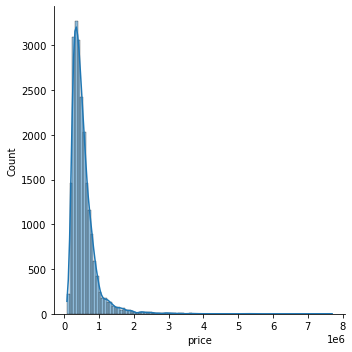

In [44]:
print("Skewness: %f" % data_3['price'].skew())
print("Kurtosis: %f" % data_3['price'].kurt())
sns.displot(data_3['price'], bins=100,kde = True);

In [45]:
#Comments
y = np.log(data_3['price'])

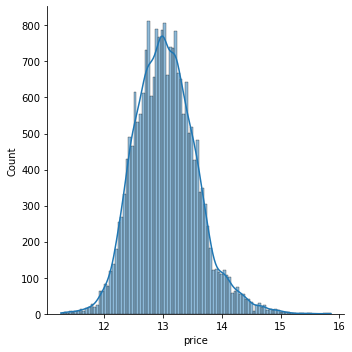

In [46]:
sns.displot(y, bins=100,kde = True);

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17277, 72), (17277,), (4320, 72), (4320,))

In [49]:
linreg = LinearRegression()
model_1 = linreg.fit(X_train, y_train)
y_hat_train = model_1.predict(X_train)
y_hat_test = model_1.predict(X_test)

In [50]:
print(linreg.intercept_)
print(linreg.coef_)
print(zip(feature_cols, linreg.coef_))

-1.6189702605297054
[ 1.49986121e-04  4.79892139e-07 -7.15548286e-04  1.37201255e+00
 -1.52711797e-01  9.49268426e-05 -2.47507737e-07  3.53010295e-03
  5.20402575e-02  7.87283922e-03 -4.15719535e-03 -2.25939413e-02
 -7.64928442e-02 -1.04695136e-01 -8.84587559e-02 -8.58011782e-02
 -4.17260011e-02 -2.45169163e-12  4.30566893e-02  4.06675754e-02
  1.96161984e-01  6.74723763e-02  1.11769778e-01  1.32591915e-01
  1.22986631e-01  1.43161785e-01  1.57643679e-01  1.76898346e-01
  2.14144703e-01  2.20679981e-01  2.89610671e-01  2.40692877e-01
  2.77077901e-01  2.19855283e-01  3.32612243e-01  3.28382727e-01
  3.26023814e-01  3.03513570e-01  1.16634725e-01  9.83751585e-01
  1.13454134e-01  3.44396168e-01 -5.71093150e-01  1.43791710e-01
  4.67595493e-01 -5.98274001e-01  7.09764619e-02  7.37755101e-02
  1.40576619e-01  1.48267326e-01  1.74440993e-01  3.74446013e-01
  1.62929530e-01  1.15771056e-01  1.68017171e-01  2.76492846e-01
  6.45982273e-03  1.37694945e-01  1.89353300e-01  2.47412866e-01
 -6.4

In [51]:
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_train

0.7779753432067725

In [52]:
r2_score_test = r2_score(y_test, y_hat_test)
r2_score_train

0.7779753432067725

In [53]:
# K-fold cross evaluation
mse = make_scorer(mean_squared_error)
cv_5_results  = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=5,  scoring=mse)))
cv_10_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=10,  scoring=mse)))
cv_20_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=20,  scoring=mse)))
cv_5_results,cv_10_results,cv_20_results

(0.25009205571861737, 0.2501366251592576, 0.2500550366858205)

In [54]:
#Calcualte RMSE for train dataset and test dataset
train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root of Mean Squared Error:', train_mse)
print('Test Root of Mean Squared Error:', test_mse)

Train Root of Mean Squared Error: 0.2482680942462596
Test Root of Mean Squared Error: 0.2538084454658139


In [55]:
import statsmodels.api as sm
predictors = X_train
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_train,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     849.1
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:08:27   Log-Likelihood:                -443.89
No. Observations:               17277   AIC:                             1032.
Df Residuals:                   17205   BIC:                             1590.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6190      4.076     -0.397      0.691      -9.609       6.371
sqft_living       0.0001   5.04e-06     29.777      0.000       0.000       0.000
sqft_lot       4.799e-07   6.84e-08      7.017      0.000    3.46e-07    6.14e-07
zipcode          -0.0007   4.61e-05    -15.515      0.000      -0.001      -0.001
lat               1.3720      0.015     91.034      0.000       1.342       1.402
long             -0.1527      0.018     -8.274      0.000      -0.189      -0.117
sqft_living15  9.493e-05   4.87e-06     19.476      0.000    8.54e-05       0.000
sqft_lot15    -2.475e-07      1e-07     -2.474      0.013   -4.44e-07   -5.14e-08
house_age         0.0035      0.000     31.378      0.000       0.003       0.004
bd_2              0.0520      0.022      2.381      0.017       0.009       0.095
bd_3              0.0079      0.022      0.360      0.719      -0.035       0.051
bd_4             -0.0042      0.022     -0.186      0.852      -0.048       0.040
bd_5             -0.0226      0.023     -0.963      0.336      -0.069       0.023
bd_6             -0.0765      0.029     -2.678      0.007      -0.132      -0.021
bd_7             -0.1047      0.050     -2.104      0.035      -0.202      -0.007
bd_8             -0.0885      0.080     -1.102      0.270      -0.246       0.069
bd_9             -0.0858      0.146     -0.586      0.558      -0.373       0.201
bd_10            -0.0417      0.182     -0.229      0.819      -0.399       0.315
bd_11         -4.488e-11   9.59e-12     -4.678      0.000   -6.37e-11   -2.61e-11
bth_0.75          0.0431      0.180      0.239      0.811      -0.309       0.395
bth_1.0           0.0407      0.176      0.231      0.818      -0.305       0.386
bth_1.25          0.1962      0.197      0.996      0.319      -0.190       0.582
bth_1.5           0.0675      0.176      0.382      0.702      -0.278       0.413
bth_1.75          0.1118      0.176      0.634      0.526      -0.234       0.458
bth_2.0           0.1326      0.176      0.752      0.452      -0.213       0.478
bth_2.25          0.1230      0.176      0.697      0.486      -0.223       0.469
bth_2.5           0.1432      0.176      0.812      0.417      -0.203       0.489
bth_2.75          0.1576      0.177      0.893      0.372      -0.188       0.504
bth_3.0           0.1769      0.177      1.001      0.317      -0.169       0.523
bth_3.25          0.2141      0.177      1.211      0.226      -0.132       0.561
bth_3.5           0.2207      0.177      1.249      0.212      -0.126       0.567
bth_3.75          0.2896      0.178      1.628      0.104      -0.059       0.638
bth_4.0           0.2407      0.178      1.351      0.177      -0.108       0.590
bth_4.25          0.2771      0.180      1.542      0.123      -0.075       0.629
bth_4.5           0.2199      0.179      1.230   

## Model 2

In [56]:
wf_dummies = pd.get_dummies(data_1['waterfront'], prefix='wf', drop_first=True)
vw_dummies = pd.get_dummies(data_1['view'], prefix='vw', drop_first=True)
gd_dummies = pd.get_dummies(data_1['grade'], prefix='gd', drop_first=True)
rn_dummies = pd.get_dummies(data_1['renovated'], prefix='rn', drop_first=True)
bs_dummies = pd.get_dummies(data_1['basement_present'], prefix='bs', drop_first=True)
data_4 = data_1.drop(['waterfront','view','grade','renovated','basement_present'],axis = 1)
data_5 = data_4.join([wf_dummies,vw_dummies,gd_dummies,rn_dummies,bs_dummies])
data_5.drop(['gd_4','gd_5','gd_6','gd_7'],axis = 1, inplace = True)
data_5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,zipcode,lat,long,...,vw_3.0,vw_4.0,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13,rn_1,bs_1
0,221900.0,3,1.00,1180,5650,1.0,3,98178,47.5112,-122.257,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,98125,47.7210,-122.319,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,2,1.00,770,10000,1.0,3,98028,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,98136,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,98074,47.6168,-122.045,...,0,0,1,0,0,0,0,0,0,0


In [57]:
feature_cols = data_5.columns[1:]

In [58]:
feature_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'wf_1.0', 'vw_1.0', 'vw_2.0', 'vw_3.0', 'vw_4.0', 'gd_8',
       'gd_9', 'gd_10', 'gd_11', 'gd_12', 'gd_13', 'rn_1', 'bs_1'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
X = data_5[feature_cols]
y = np.log(data_5['price'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [62]:
# define the sclaer
scaler = StandardScaler()
# fit on the trainning dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test =  scaler.transform(X_test)

In [63]:
linreg = LinearRegression()
model_2 = linreg.fit(X_train, y_train)
y_hat_train = model_2.predict(X_train)
y_hat_test = model_2.predict(X_test)

In [64]:
print(linreg.intercept_)
print(linreg.coef_)
print(zip(feature_cols, linreg.coef_))
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_train

13.046761309802708
[-0.01211117  0.0570678   0.14287489  0.0199333   0.04432916  0.0413747
 -0.04173621  0.19830344 -0.02847509  0.07477055 -0.00825652  0.08735292
  0.03115715  0.02003099  0.02411319  0.02449371  0.03076061  0.07924905
  0.11051951  0.0982681   0.06648474  0.03390728  0.01664079  0.01563701
  0.02349202]


0.7633151562304519

In [65]:
X_train_scaled = pd.DataFrame(X_train,columns = feature_cols)
X_train_scaled.reset_index(drop = True)
y_train.reset_index(drop = True)

0        12.936034
1        13.017003
2        12.971540
3        14.038654
4        14.594835
           ...    
17272    12.205823
17273    12.901717
17274    13.475520
17275    14.375126
17276    13.384728
Name: price, Length: 17277, dtype: float64

In [66]:
import statsmodels.api as sm
predictors = X_train_scaled
predictors_int = sm.add_constant(predictors)

In [67]:
model = sm.OLS(y_train.values,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     2225.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:08:27   Log-Likelihood:                -996.24
No. Observations:               17277   AIC:                             2044.
Df Residuals:                   17251   BIC:                             2246.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0468      0.002   6685.045      0.000      13.043      13.051
bedrooms         -0.0121      0.003     -4.637      0.000      -0.017      -0.007
bathrooms         0.0571      0.004     15.713      0.000       0.050       0.064
sqft_living       0.1429      0.005     30.710      0.000       0.134       0.152
sqft_lot          0.0199      0.003      6.947      0.000       0.014       0.026
floors            0.0443      0.003     16.397      0.000       0.039       0.050
condition         0.0414      0.002     19.076      0.000       0.037       0.046
zipcode          -0.0417      0.003    -16.559      0.000      -0.047      -0.037
lat               0.1983      0.002     93.970      0.000       0.194       0.202
long             -0.0285      0.003    -10.841      0.000      -0.034      -0.023
sqft_living15     0.0748      0.003     22.177      0.000       0.068       0.081
sqft_lot15       -0.0083      0.003     -2.858      0.004      -0.014      -0.003
house_age         0.0874      0.003     29.273      0.000       0.082       0.093
wf_1.0            0.0312      0.002     13.141      0.000       0.027       0.036
vw_1.0            0.0200      0.002     10.113      0.000       0.016       0.024
vw_2.0            0.0241      0.002     11.945      0.000       0.020       0.028
vw_3.0            0.0245      0.002     12.094      0.000       0.021       0.028
vw_4.0            0.0308      0.002     12.712      0.000       0.026       0.036
gd_8              0.0792      0.002     32.002      0.000       0.074       0.084
gd_9              0.1105      0.003     40.030      0.000       0.105       0.116
gd_10             0.0983      0.003     36.368      0.000       0.093       0.104
gd_11             0.0665      0.002     26.720      0.000       0.062       0.071
gd_12             0.0339      0.002     15.486      0.000       0.030       0.038
gd_13             0.0166      0.002      8.120      0.000       0.013       0.021
rn_1              0.0156      0.002      7.567      0.000       0.012       0.020
bs_1              0.0235      0.002      9.936      0.000       0.019       0.028
==============================================================================
Omnibus:                      357.067   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.406
Skew:                          -0.102   Prob(JB):                    3.02e-158
Kurtosis:                       3.983   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# K-fold cross evaluation
mse = make_scorer(mean_squared_error)
cv_5_results  = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=5,  scoring=mse)))
cv_10_results_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=10,  scoring=mse)))
cv_20_results_results = np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=20,  scoring=mse)))
cv_5_results,cv_10_results,cv_20_results_results

(0.25680591175743106, 0.2501366251592576, 0.2567711087172351)

In [69]:
#Calculate residuals for train dataset and test dataset
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

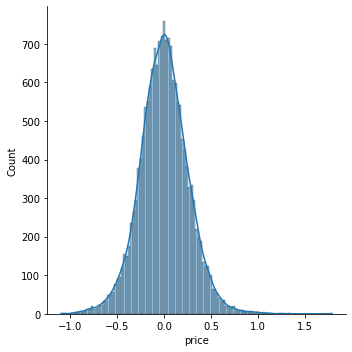

In [70]:
sns.displot(x= train_residuals, kind = 'hist', kde = True)

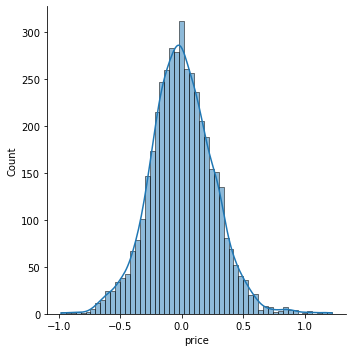

In [71]:
sns.displot(x= test_residuals, kind = 'hist', kde = True)

In [72]:
#Calcualte RMSE for train dataset and test dataset
train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root of Mean Squared Error:', train_mse)
print('Test Root of Mean Squared Error:', test_mse)

Train Root of Mean Squared Error: 0.25633359658665
Test Root of Mean Squared Error: 0.2588939486589958


## Model 3

In [73]:
X = data_5[feature_cols]
y = np.log(data_5['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [74]:
#Fitting a polynomial on the training set
degree=[1,2,3]
r2_score_polydegrees=[]
rmse_polyfeatures=[]
test_root_mean_sqaure_error = []
mean_absolute_sqare_error = []
for degrees in degree:
    Poly = make_pipeline(PolynomialFeatures(degree=degrees,interaction_only=True,include_bias = False), StandardScaler(), LinearRegression(fit_intercept=True))
    Poly.fit(X_train, y_train)
    ####################################
    mse = mean_squared_error(y_train, Poly.predict(X_train))
    r2_score_polydegrees.append(Poly.score(X_train,y_train))
    rmse_polyfeatures.append(np.sqrt(mean_squared_error(y_train, Poly.predict(X_train))))
    test_root_mean_sqaure_error.append(np.sqrt(mean_squared_error(y_test, Poly.predict(X_test))))
print(r2_score_polydegrees)
print(rmse_polyfeatures)
print(test_root_mean_sqaure_error)

[0.7633151562304517, 0.8086854547520677, 0.8465161327031625]
[0.25633359658665, 0.23045933358877124, 0.20641995239677463]
[0.25889394865899573, 0.24014936707147885, 1135060186.963989]


In [75]:
#Polynomialregression degree 2 gives me the best model. Fiting best model on test set.
model_final = make_pipeline(PolynomialFeatures(degree = 2,interaction_only=True,include_bias = False), StandardScaler(),LinearRegression(fit_intercept=True))
model_final.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [76]:
rmse_train = np.sqrt(mean_squared_error(y_train, model_final.predict(X_train)))
r2_score_train = model_final.score(X_train, y_train)
print(r2_score_train,rmse_train)

0.8086854547520677 0.23045933358877124


In [77]:
feature_names = model_final['polynomialfeatures'].get_feature_names()

In [78]:
coef = model_final['linearregression'].coef_
incept = model_final['linearregression'].intercept_

In [79]:
incept,len(coef)

(13.046784688362743, 325)

In [80]:
df = pd.DataFrame(data = coef, index = feature_names)

In [81]:
df.head(5)

,0
x0,30.459130
x1,-13.132641
x2,-14.698641
x3,-12.061531
x4,-45.075236


In [82]:
rmse_test=np.sqrt(mean_squared_error(y_test, model_final.predict(X_test)))
r2_score_test=(model_final.score(X_test,y_test))
print(r2_score_test,rmse_test)

0.7908473967883167 0.24014936707147885


In [83]:
y_test_pred = model_final.predict(X_test)

In [84]:
# Transfer log price to actual price
y_test_pred_real = np.exp(y_test_pred)
y_test_real = np.exp(y_test)
mean_absolute_error(y_test_real, y_test_pred_real)

101427.2482687995

In [85]:
np.mean(y_test_real)

541825.3400462962

## Model Diagnostics

In [86]:
y_hat_train = model_final.predict(X_train)
y_hat_test = model_final.predict(X_test)
#Calculate residuals for train dataset and test dataset
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Text(0.5, 0, 'Predicted Y')

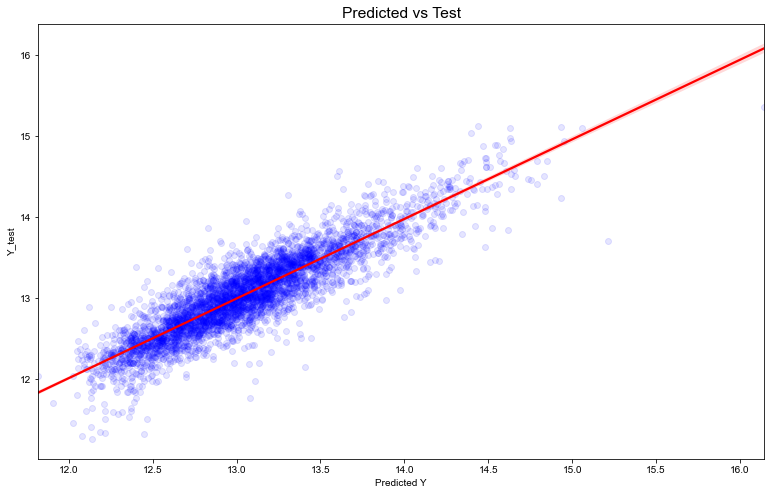

In [87]:
#Regression plot for residuals
plt.figure(figsize=(13,8))
#sns.set(style="whitegrid")
sns.regplot(y_hat_test,y_test,scatter_kws={'color':'b','alpha':0.1},color='r')
sns.set(font_scale=1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y_test')
plt.xlabel('Predicted Y')

Text(0.5, 1.0, 'Normal Q-Q plot')

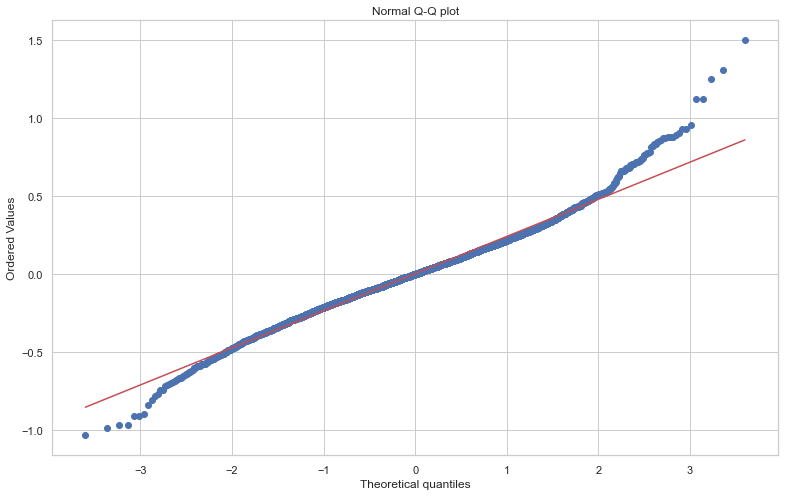

In [89]:
#Normal Q-Q plot
sns.set(style="whitegrid")
plt.figure(figsize=(13,8))
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

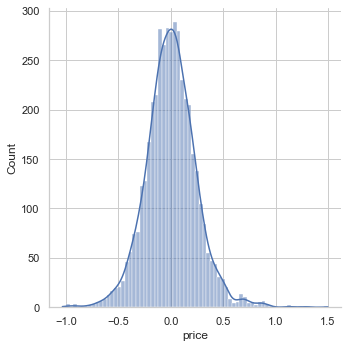

In [90]:
# Normal Distribution Assumption
sns.displot(x= test_residuals, kind = 'hist', kde = True)

Text(0.5, 1.0, 'Residual Plot')

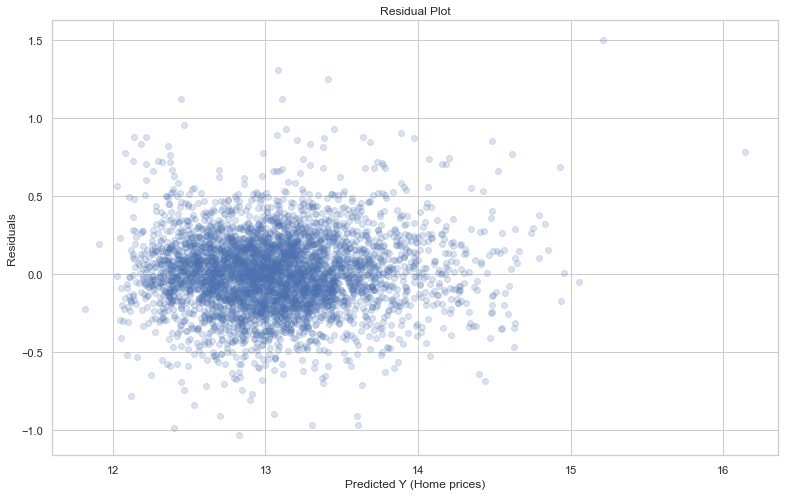

In [91]:
#Residual Plot
plt.figure(figsize=(13,8))
plt.scatter(y_hat_test ,test_residuals,alpha=0.2)
plt.xlabel('Predicted Y (Home prices)')
plt.ylabel('Residuals')
plt.title("Residual Plot")